In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.linear_model import LinearRegression

In [3]:
# Open csv file
efficency_fva = pd.read_csv('offensive_efficency_scores.csv')

In [4]:
# See first five games in the file
# Win = 1, Loss = 0 
efficency_fva.head()

,DateOfGame,Team,Opponent,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficency,EfficentPointsScored,RawEOP
0,12/3/2020,Kaukauna,Appleton North,73,51,20,10,7,11,Win,0.457627,33.406780,35.841356
1,12/4/2020,Kaukauna,Oshkosh West,72,48,25,3,14,10,Win,0.565217,40.695652,46.709565
2,12/8/2020,Kaukauna,Appleton East,86,56,27,6,14,15,Win,0.518987,44.632911,50.154937
3,12/11/2020,Kaukauna,Hortonville,72,55,25,12,14,21,Win,0.500000,36.000000,41.320000
4,12/12/2020,Kaukauna,De Pere,61,54,21,6,13,7,Loss,0.500000,30.500000,35.440000


In [5]:
dummy = pd.get_dummies(efficency_fva['WinOrLoss'])
efficency_fva = pd.concat([efficency_fva, dummy], axis = 1)
efficency_fva.head()

,DateOfGame,Team,Opponent,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
0,12/3/2020,Kaukauna,Appleton North,73,51,20,10,7,11,Win,0.457627,33.406780,35.841356,0,1
1,12/4/2020,Kaukauna,Oshkosh West,72,48,25,3,14,10,Win,0.565217,40.695652,46.709565,0,1
2,12/8/2020,Kaukauna,Appleton East,86,56,27,6,14,15,Win,0.518987,44.632911,50.154937,0,1
3,12/11/2020,Kaukauna,Hortonville,72,55,25,12,14,21,Win,0.500000,36.000000,41.320000,0,1
4,12/12/2020,Kaukauna,De Pere,61,54,21,6,13,7,Loss,0.500000,30.500000,35.440000,1,0


In [6]:
# Create table with numeric values 
efficency_fva_num = efficency_fva.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [7]:
# Differences in wins and losses
win = efficency_fva_num[efficency_fva_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = efficency_fva_num[efficency_fva_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,73.945652,53.510870,26.978261,9.163043,15.826087,11.456522,0.592809,44.572327,51.921045
std,12.842550,8.839838,5.999960,3.992513,4.731491,3.812683,0.080643,12.944827,15.553673
min,48.000000,35.000000,15.000000,1.000000,7.000000,4.000000,0.421053,20.210526,23.090526
25%,66.000000,47.750000,22.000000,6.000000,12.000000,8.000000,0.526407,35.054862,39.649055
50%,73.000000,53.000000,27.000000,9.000000,15.500000,12.000000,0.592105,42.926471,49.589968
75%,82.250000,60.000000,31.000000,12.000000,19.000000,14.000000,0.653636,53.006667,62.086098
max,108.000000,75.000000,43.000000,19.000000,29.000000,21.000000,0.784091,82.329545,97.823182


In [8]:
# Now losses
loss.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,59.094118,50.658824,21.235294,7.552941,12.000000,13.717647,0.482252,29.009106,33.565743
std,10.285940,7.333149,4.526764,3.469273,4.123106,4.963226,0.081831,8.902164,10.662588
min,34.000000,25.000000,12.000000,2.000000,4.000000,0.000000,0.311475,11.213115,12.870164
25%,53.000000,46.000000,18.000000,5.000000,9.000000,10.000000,0.416667,21.538462,24.753846
50%,60.000000,52.000000,22.000000,7.000000,12.000000,14.000000,0.484375,28.500000,32.806154
75%,65.000000,55.000000,24.000000,10.000000,14.000000,16.000000,0.526316,34.571429,40.923243
max,81.000000,72.000000,33.000000,21.000000,28.000000,26.000000,0.693878,54.296703,68.561319


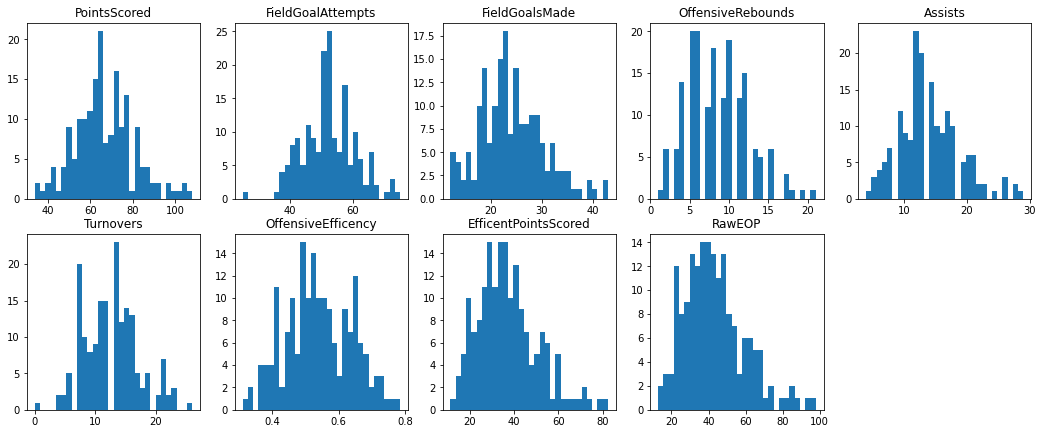

In [10]:
# See normality of data 
cols = list(efficency_fva_num.drop(columns = ['Win', 'Loss']))
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)
for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(efficency_fva_num[cols[i]], bins=30)
    plt.title(cols[i])

In [11]:
# Correlations 
efficency_fva_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.548945,0.906136,0.240928,0.642579,-0.234957,0.769625,0.947802,0.928164,-0.538214,0.538214
FieldGoalAttempts,0.548945,1.000000,0.646817,0.574090,0.401274,-0.187920,0.273526,0.459444,0.456846,-0.173145,0.173145
FieldGoalsMade,0.906136,0.646817,1.000000,0.289823,0.687233,-0.242564,0.815158,0.920768,0.914803,-0.475144,0.475144
OffensiveRebounds,0.240928,0.574090,0.289823,1.000000,0.196573,0.032617,0.227043,0.258466,0.258356,-0.210857,0.210857
Assists,0.642579,0.401274,0.687233,0.196573,1.000000,-0.188205,0.753192,0.742938,0.800999,-0.396594,0.396594
Turnovers,-0.234957,-0.187920,-0.242564,0.032617,-0.188205,1.000000,-0.484347,-0.373078,-0.368805,0.249868,-0.249868
OffensiveEfficency,0.769625,0.273526,0.815158,0.227043,0.753192,-0.484347,1.000000,0.918801,0.930004,-0.564557,0.564557
EfficentPointsScored,0.947802,0.459444,0.920768,0.258466,0.742938,-0.373078,0.918801,1.000000,0.995382,-0.572878,0.572878
RawEOP,0.928164,0.456846,0.914803,0.258356,0.800999,-0.368805,0.930004,0.995382,1.000000,-0.566092,0.566092
Loss,-0.538214,-0.173145,-0.475144,-0.210857,-0.396594,0.249868,-0.564557,-0.572878,-0.566092,1.000000,-1.000000


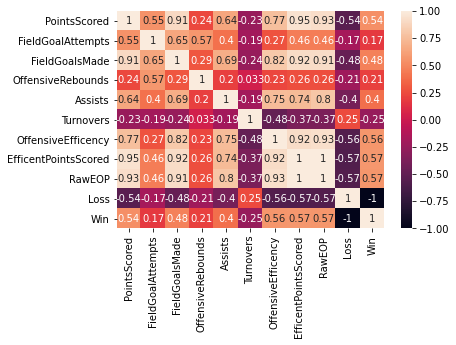

In [15]:
# Correlation heatmap
sns.heatmap(efficency_fva_num.corr(), annot = True);

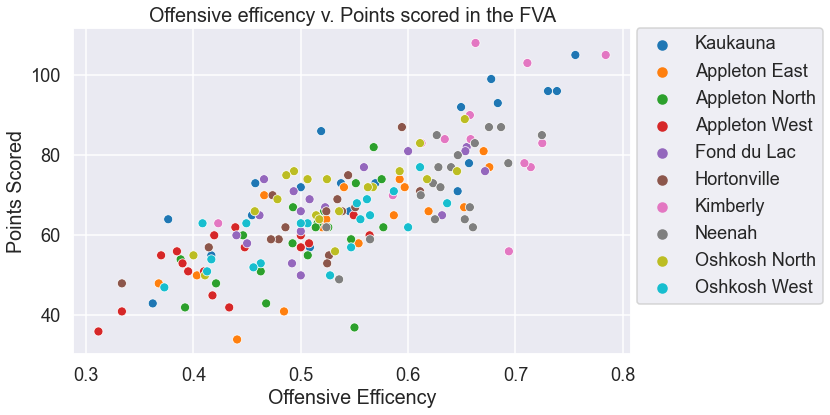

In [68]:
# Create visual for offensive efficency v. points scored
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.scatterplot(x="OffensiveEfficency", 
                y="PointsScored", 
                hue="Team",
                data=efficency_fva)
plt.xlabel("Offensive Efficency")
plt.ylabel("Points Scored")
#place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Offensive efficency v. Points scored in the FVA");



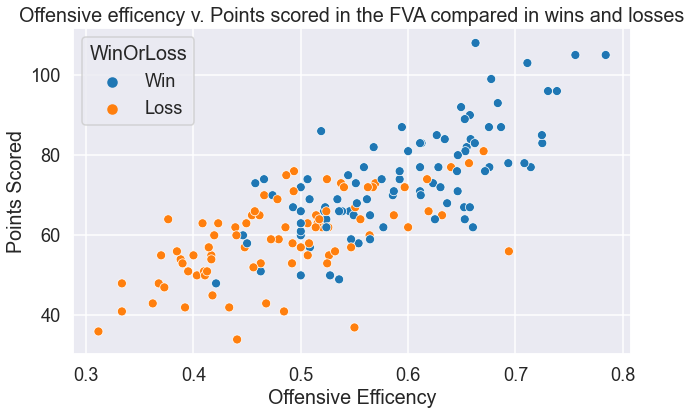

In [69]:
# Create visual for offensive efficency v. points scored
plt.figure(figsize=(10,6))
sns.scatterplot(x="OffensiveEfficency", 
                y="PointsScored", 
                hue="WinOrLoss",
                data=efficency_fva)
plt.xlabel("Offensive Efficency")
plt.ylabel("Points Scored")
plt.title("Offensive efficency v. Points scored in the FVA compared in wins and losses");


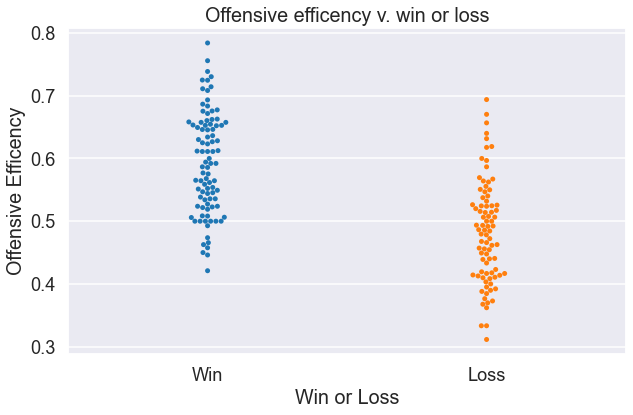

In [76]:
# Swarmplot for wins and losses with offensive efficency
plt.figure(figsize=(10,6))
sns.swarmplot(x=efficency_fva['WinOrLoss'],
              y=efficency_fva['OffensiveEfficency'])
plt.ylabel("Offensive Efficency")
plt.xlabel("Win or Loss")
plt.title("Offensive efficency v. win or loss");

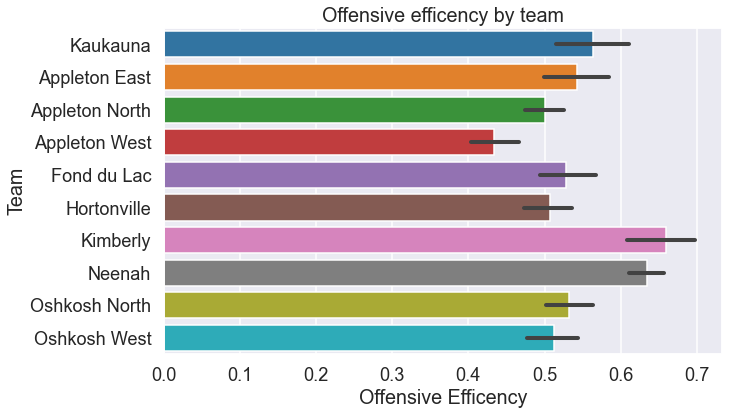

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x="OffensiveEfficency", y="Team", data=efficency_fva)
plt.xlabel("Offensive Efficency")
plt.ylabel("Team")
plt.title("Offensive efficency by team");

<Figure size 720x432 with 0 Axes>

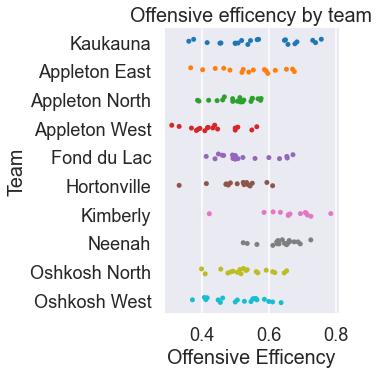

In [79]:
# Checking team by team offensive efficency 
plt.figure(figsize=(10,6))
sns.catplot(x = "OffensiveEfficency", y = "Team", data = efficency_fva)
plt.xlabel("Offensive Efficency")
plt.ylabel("Team")
plt.title("Offensive efficency by team");

<Figure size 720x432 with 0 Axes>

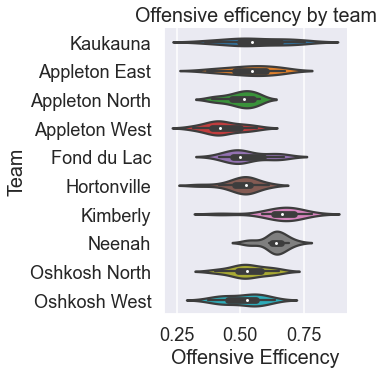

In [85]:
# Checking consistency of teams
plt.figure(figsize=(10,6))
sns.catplot(x="OffensiveEfficency",y="Team",data=efficency_fva, kind = 'violin')
plt.xlabel("Offensive Efficency")
plt.ylabel("Team")
plt.title("Offensive efficency by team");

In [603]:
# Creating data frames for teams 
appleton_east = efficency_fva[efficency_fva.Team == 'Appleton East']
applet_north = efficency_fva[efficency_fva.Team == 'Appleton North']
appleton_west = efficency_fva[efficency_fva.Team == 'Appleton West']
fond_du_lac = efficency_fva[efficency_fva.Team == 'Fond du Lac']
hortonville = efficency_fva[efficency_fva.Team == 'Hortonville']
kaukauna = efficency_fva[efficency_fva.Team == 'Kaukauna']
kimberly = efficency_fva[efficency_fva.Team == 'Kimberly']
neenah = efficency_fva[efficency_fva.Team == 'Neenah']
oshkosh_north = efficency_fva[efficency_fva.Team == 'Oshkosh North']
oshkosh_west = efficency_fva[efficency_fva.Team == 'Oshkosh West']

In [604]:
# Creating data frames for teams and numeric values
appleton_east_num = appleton_east.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_num = appleton_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_num = appleton_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_num = fond_du_lac.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_num = hortonville.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_num = kaukauna.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_num = kimberly.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_num = neenah.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_num = oshkosh_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_num = oshkosh_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [494]:
# Creating data frames for teams to see what they give up 
appleton_east_opp = efficency_fva[efficency_fva.Opponent == 'Appleton East']
appleton_north_opp = efficency_fva[efficency_fva.Opponent == 'Appleton North']
appleton_west_opp = efficency_fva[efficency_fva.Opponent == 'Appleton West']
fond_du_lac_opp = efficency_fva[efficency_fva.Opponent == 'Fond du Lac']
hortonville_opp = efficency_fva[efficency_fva.Opponent == 'Hortonville']
kaukauna_opp = efficency_fva[efficency_fva.Opponent == 'Kaukauna']
kimberly_opp = efficency_fva[efficency_fva.Opponent == 'Kimberly']
neenah_opp = efficency_fva[efficency_fva.Opponent == 'Neenah']
oshkosh_north_opp = efficency_fva[efficency_fva.Opponent == 'Oshkosh North']
oshkosh_west_opp = efficency_fva[efficency_fva.Opponent == 'Oshkosh West']


In [495]:
# Create numeric values
appleton_east_opp_num = appleton_east_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_opp_num = appleton_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_opp_num = appleton_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_opp_num = fond_du_lac_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_opp_num = hortonville_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_opp_num = kaukauna_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_opp_num = kimberly_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_opp_num = neenah_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_opp_num = oshkosh_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_opp_num = oshkosh_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [496]:
# Appleton East offense correlations
appleton_east_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.590051,0.865805,0.052021,0.798988,-0.182227,0.759283,0.939772,0.923821,-0.286267,0.286267
FieldGoalAttempts,0.590051,1.000000,0.693702,0.266778,0.663920,-0.155588,0.386265,0.529318,0.552429,0.031935,-0.031935
FieldGoalsMade,0.865805,0.693702,1.000000,-0.048841,0.881280,-0.274555,0.823715,0.901736,0.911775,-0.139907,0.139907
OffensiveRebounds,0.052021,0.266778,-0.048841,1.000000,-0.004449,0.077218,0.119558,0.083310,0.077066,-0.312001,0.312001
Assists,0.798988,0.663920,0.881280,-0.004449,1.000000,-0.317557,0.795836,0.865970,0.901315,-0.247794,0.247794
Turnovers,-0.182227,-0.155588,-0.274555,0.077218,-0.317557,1.000000,-0.588962,-0.411365,-0.422804,0.254034,-0.254034
OffensiveEfficency,0.759283,0.386265,0.823715,0.119558,0.795836,-0.588962,1.000000,0.929339,0.933381,-0.420848,0.420848
EfficentPointsScored,0.939772,0.529318,0.901736,0.083310,0.865970,-0.411365,0.929339,1.000000,0.996470,-0.362087,0.362087
RawEOP,0.923821,0.552429,0.911775,0.077066,0.901315,-0.422804,0.933381,0.996470,1.000000,-0.356036,0.356036
Loss,-0.286267,0.031935,-0.139907,-0.312001,-0.247794,0.254034,-0.420848,-0.362087,-0.356036,1.000000,-1.000000


In [605]:
# Appleton East offense compared in wins and losses 
appleton_east_win = appleton_east_num[appleton_east_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = appleton_east_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
appleton_east_loss = appleton_east_num[appleton_east_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_east_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
appleton_east_offense = pd.concat(frames)
appleton_east_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Averages in Wins,68.000000,48.400000,23.600000,7.400000,18.200000,10.200000,0.599522,41.037071,49.464712
Number of Losses,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
Averages in Losses,60.090909,48.818182,22.090909,5.181818,15.636364,12.909091,0.517717,32.059626,38.480897


In [606]:
# Appleton East defense correlations
appleton_east_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.218339,0.831482,-0.329093,0.558757,-0.421525,0.759040,0.948967,0.932166,-0.550778,0.550778
FieldGoalAttempts,0.218339,1.000000,0.488866,0.635850,0.063443,-0.178689,-0.010933,0.138319,0.131333,-0.230441,0.230441
FieldGoalsMade,0.831482,0.488866,1.000000,-0.101536,0.611913,-0.434677,0.804233,0.875633,0.877507,-0.540097,0.540097
OffensiveRebounds,-0.329093,0.635850,-0.101536,1.000000,-0.548645,0.059024,-0.403953,-0.360066,-0.389692,0.152702,-0.152702
Assists,0.558757,0.063443,0.611913,-0.548645,1.000000,-0.305215,0.709218,0.648426,0.706586,-0.458244,0.458244
Turnovers,-0.421525,-0.178689,-0.434677,0.059024,-0.305215,1.000000,-0.648300,-0.571733,-0.577405,0.281820,-0.281820
OffensiveEfficency,0.759040,-0.010933,0.804233,-0.403953,0.709218,-0.648300,1.000000,0.919582,0.936339,-0.494943,0.494943
EfficentPointsScored,0.948967,0.138319,0.875633,-0.360066,0.648426,-0.571733,0.919582,1.000000,0.996486,-0.551985,0.551985
RawEOP,0.932166,0.131333,0.877507,-0.389692,0.706586,-0.577405,0.936339,0.996486,1.000000,-0.557188,0.557188
Loss,-0.550778,-0.230441,-0.540097,0.152702,-0.458244,0.281820,-0.494943,-0.551985,-0.557188,1.000000,-1.000000


In [607]:
# Appleton East opponent's offense compared in wins and losses 
appleton_east_win_opp = appleton_east_opp_num[appleton_east_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
appleton_east_loss_opp = appleton_east_opp_num[appleton_east_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_east_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = appleton_east_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
appleton_east_opp = pd.concat(frames)
appleton_east_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
Averages in Wins,57.800000,51.200000,22.000000,8.400000,11.000000,12.800000,0.493806,28.86351,33.107779
Number of Losses,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000
Averages in Losses,72.444444,54.666667,27.333333,7.222222,14.222222,10.777778,0.574167,42.16661,48.457744


In [608]:
# Appleton North offense correlations
appleton_north_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.787662,0.913596,0.342277,0.466375,0.221346,0.568442,0.950110,0.933675,-0.506479,0.506479
FieldGoalAttempts,0.787662,1.000000,0.852552,0.593108,0.548825,0.071139,0.472349,0.766413,0.777713,-0.297734,0.297734
FieldGoalsMade,0.913596,0.852552,1.000000,0.280335,0.450970,0.116869,0.648456,0.926285,0.913956,-0.482902,0.482902
OffensiveRebounds,0.342277,0.593108,0.280335,1.000000,0.391237,0.108466,0.187726,0.334809,0.362584,-0.211757,0.211757
Assists,0.466375,0.548825,0.450970,0.391237,1.000000,0.252816,0.458239,0.500091,0.601749,0.118396,-0.118396
Turnovers,0.221346,0.071139,0.116869,0.108466,0.252816,1.000000,-0.466982,-0.015786,0.002342,-0.100908,0.100908
OffensiveEfficency,0.568442,0.472349,0.648456,0.187726,0.458239,-0.466982,1.000000,0.790603,0.807941,-0.288454,0.288454
EfficentPointsScored,0.950110,0.766413,0.926285,0.334809,0.500091,-0.015786,0.790603,1.000000,0.992192,-0.487237,0.487237
RawEOP,0.933675,0.777713,0.913956,0.362584,0.601749,0.002342,0.807941,0.992192,1.000000,-0.428454,0.428454
Loss,-0.506479,-0.297734,-0.482902,-0.211757,0.118396,-0.100908,-0.288454,-0.487237,-0.428454,1.000000,-1.000000


In [609]:
# Appleton North offense compared in wins and losses 
appleton_north_win = appleton_north_num[appleton_north_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = appleton_north_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
appleton_north_loss = appleton_north_num[appleton_north_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_north_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
appleton_north_offense = pd.concat(frames)
appleton_north_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
Averages in Wins,64.200000,49.800000,23.000000,7.800000,12.000000,13.500000,0.516271,33.544774,38.300315
Number of Losses,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
Averages in Losses,52.888889,45.333333,18.222222,6.666667,12.777778,12.555556,0.483546,25.692770,30.482938


In [610]:
# Appleton North opponent's offense correlations
appleton_north_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.258340,0.903108,0.096359,0.589469,-0.257241,0.820684,0.941866,0.920226,-0.571330,0.571330
FieldGoalAttempts,0.258340,1.000000,0.368418,0.771920,0.261306,-0.414021,0.129367,0.246381,0.248933,0.016207,-0.016207
FieldGoalsMade,0.903108,0.368418,1.000000,0.061657,0.819339,-0.413257,0.944322,0.973663,0.980014,-0.567742,0.567742
OffensiveRebounds,0.096359,0.771920,0.061657,1.000000,-0.180329,-0.158003,-0.150850,0.020135,-0.005262,0.211924,-0.211924
Assists,0.589469,0.261306,0.819339,-0.180329,1.000000,-0.250130,0.822419,0.742460,0.789678,-0.487371,0.487371
Turnovers,-0.257241,-0.414021,-0.413257,-0.158003,-0.250130,1.000000,-0.480985,-0.418023,-0.422150,0.608424,-0.608424
OffensiveEfficency,0.820684,0.129367,0.944322,-0.150850,0.822419,-0.480985,1.000000,0.949000,0.962560,-0.698609,0.698609
EfficentPointsScored,0.941866,0.246381,0.973663,0.020135,0.742460,-0.418023,0.949000,1.000000,0.996980,-0.640275,0.640275
RawEOP,0.920226,0.248933,0.980014,-0.005262,0.789678,-0.422150,0.962560,0.996980,1.000000,-0.644492,0.644492
Loss,-0.571330,0.016207,-0.567742,0.211924,-0.487371,0.608424,-0.698609,-0.640275,-0.644492,1.000000,-1.000000


In [611]:
# Appleton North opponent's offense compared in wins and losses 
appleton_north_win_opp = appleton_north_opp_num[appleton_north_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
appleton_north_loss_opp = appleton_north_opp_num[appleton_north_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_north_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = appleton_north_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
appleton_north_opp = pd.concat(frames)
appleton_north_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
Averages in Wins,53.000000,53.400000,18.000000,9.800000,11.400000,15.200000,0.414030,22.893164,26.624034
Number of Losses,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Averages in Losses,69.714286,53.142857,25.142857,8.285714,15.571429,9.857143,0.574651,40.564559,47.562815


In [612]:
# Appleton West offense correlations
appleton_west_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.102743,0.880885,-0.181964,0.248131,0.007754,0.718987,0.903470,0.851486,-0.416711,0.416711
FieldGoalAttempts,0.102743,1.000000,0.277349,0.374775,0.511162,-0.247019,0.167151,0.130569,0.213450,0.097984,-0.097984
FieldGoalsMade,0.880885,0.277349,1.000000,0.039408,0.293362,-0.041711,0.826461,0.898084,0.861674,-0.214092,0.214092
OffensiveRebounds,-0.181964,0.374775,0.039408,1.000000,0.154816,-0.034931,0.234977,0.064431,0.102178,-0.260613,0.260613
Assists,0.248131,0.511162,0.293362,0.154816,1.000000,-0.009303,0.488217,0.424410,0.579888,-0.211007,0.211007
Turnovers,0.007754,-0.247019,-0.041711,-0.034931,-0.009303,1.000000,-0.304380,-0.174817,-0.170956,0.147024,-0.147024
OffensiveEfficency,0.718987,0.167151,0.826461,0.234977,0.488217,-0.304380,1.000000,0.941587,0.949414,-0.481878,0.481878
EfficentPointsScored,0.903470,0.130569,0.898084,0.064431,0.424410,-0.174817,0.941587,1.000000,0.983128,-0.521339,0.521339
RawEOP,0.851486,0.213450,0.861674,0.102178,0.579888,-0.170956,0.949414,0.983128,1.000000,-0.511794,0.511794
Loss,-0.416711,0.097984,-0.214092,-0.260613,-0.211007,0.147024,-0.481878,-0.521339,-0.511794,1.000000,-1.000000


In [613]:
# Appleton West Offense compared in wins and losses 
appleton_west_win = appleton_west_num[appleton_west_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = appleton_west_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
appleton_west_loss = appleton_west_num[appleton_west_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_west_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
appleton_west_offense = pd.concat(frames)
appleton_west_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Averages in Wins,62.500000,51.000000,22.0,12.000000,12.000000,13.500000,0.524648,32.852113,37.730563
Number of Losses,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
Averages in Losses,52.266667,52.733333,19.6,9.266667,9.266667,15.533333,0.421534,22.344299,25.396331


In [614]:
# Appleton West opponent's offense correlations
appleton_west_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.644168,0.964988,0.246173,0.707938,-0.440759,0.830816,0.966268,0.951023,NaN,NaN
FieldGoalAttempts,0.644168,1.000000,0.655411,0.711576,0.522635,-0.101608,0.390813,0.542569,0.544182,NaN,NaN
FieldGoalsMade,0.964988,0.655411,1.000000,0.301567,0.707703,-0.422177,0.879459,0.963907,0.950867,NaN,NaN
OffensiveRebounds,0.246173,0.711576,0.301567,1.000000,0.261670,0.111827,0.247542,0.245749,0.252099,NaN,NaN
Assists,0.707938,0.522635,0.707703,0.261670,1.000000,-0.307224,0.763394,0.758386,0.821735,NaN,NaN
Turnovers,-0.440759,-0.101608,-0.422177,0.111827,-0.307224,1.000000,-0.586477,-0.544946,-0.535556,NaN,NaN
OffensiveEfficency,0.830816,0.390813,0.879459,0.247542,0.763394,-0.586477,1.000000,0.933031,0.941245,NaN,NaN
EfficentPointsScored,0.966268,0.542569,0.963907,0.245749,0.758386,-0.544946,0.933031,1.000000,0.994283,NaN,NaN
RawEOP,0.951023,0.544182,0.950867,0.252099,0.821735,-0.535556,0.941245,0.994283,1.000000,NaN,NaN
Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [615]:
# Appleton West opponent's offense compared in wins and losses 
appleton_west_win_opp = appleton_west_opp_num[appleton_west_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
appleton_west_loss_opp = appleton_west_opp_num[appleton_west_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = appleton_west_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = appleton_west_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
appleton_west_opp = pd.concat(frames)
appleton_west_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Averages in Wins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Losses,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
Averages in Losses,77.642857,56.285714,27.571429,11.642857,17.857143,11.428571,0.608201,48.353443,56.931523


In [616]:
# Fond du Lac offense correlations
fond_du_lac_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.228164,0.695239,-0.021305,0.528399,-0.450601,0.689907,0.908593,0.884137,-0.413541,0.413541
FieldGoalAttempts,0.228164,1.000000,0.522823,0.457250,0.170199,-0.014233,-0.149249,0.018631,0.021726,0.161753,-0.161753
FieldGoalsMade,0.695239,0.522823,1.000000,-0.161758,0.622421,-0.402119,0.620959,0.709366,0.724065,-0.248788,0.248788
OffensiveRebounds,-0.021305,0.457250,-0.161758,1.000000,-0.205842,0.299128,-0.277254,-0.172302,-0.195607,0.099075,-0.099075
Assists,0.528399,0.170199,0.622421,-0.205842,1.000000,-0.296334,0.702563,0.663169,0.728704,-0.415526,0.415526
Turnovers,-0.450601,-0.014233,-0.402119,0.299128,-0.296334,1.000000,-0.714260,-0.635076,-0.623228,-0.072877,0.072877
OffensiveEfficency,0.689907,-0.149249,0.620959,-0.277254,0.702563,-0.714260,1.000000,0.926194,0.941508,-0.362849,0.362849
EfficentPointsScored,0.908593,0.018631,0.709366,-0.172302,0.663169,-0.635076,0.926194,1.000000,0.995267,-0.420710,0.420710
RawEOP,0.884137,0.021726,0.724065,-0.195607,0.728704,-0.623228,0.941508,0.995267,1.000000,-0.430239,0.430239
Loss,-0.413541,0.161753,-0.248788,0.099075,-0.415526,-0.072877,-0.362849,-0.420710,-0.430239,1.000000,-1.000000


In [617]:
# Fond du Lac offense compared in wins and losses 
fond_du_lac_win = fond_du_lac_num[fond_du_lac_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = fond_du_lac_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
fond_du_lac_loss = fond_du_lac_num[fond_du_lac_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = fond_du_lac_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
fond_du_lac_offense = pd.concat(frames)
fond_du_lac_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000
Averages in Wins,70.166667,47.750000,23.166667,6.000000,13.5,11.583333,0.548752,39.035081,44.781296
Number of Losses,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000
Averages in Losses,61.833333,50.333333,21.166667,6.666667,10.5,11.000000,0.488675,30.355180,34.356957


In [618]:
# Fond du Lac opponent's offense correlations
fond_du_lac_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.495045,0.957382,-0.232130,0.708775,-0.175041,0.725296,0.937995,0.916152,-0.466364,0.466364
FieldGoalAttempts,0.495045,1.000000,0.556128,0.339557,0.457146,-0.295433,0.210447,0.410962,0.411908,-0.170460,0.170460
FieldGoalsMade,0.957382,0.556128,1.000000,-0.179770,0.793403,-0.289179,0.792463,0.951554,0.940802,-0.456353,0.456353
OffensiveRebounds,-0.232130,0.339557,-0.179770,1.000000,0.038451,-0.191492,-0.004207,-0.147277,-0.128953,-0.108465,0.108465
Assists,0.708775,0.457146,0.793403,0.038451,1.000000,-0.649969,0.893527,0.865037,0.898948,-0.493461,0.493461
Turnovers,-0.175041,-0.295433,-0.289179,-0.191492,-0.649969,1.000000,-0.600968,-0.431863,-0.475027,0.104516,-0.104516
OffensiveEfficency,0.725296,0.210447,0.792463,-0.004207,0.893527,-0.600968,1.000000,0.899228,0.915098,-0.506138,0.506138
EfficentPointsScored,0.937995,0.410962,0.951554,-0.147277,0.865037,-0.431863,0.899228,1.000000,0.997137,-0.509851,0.509851
RawEOP,0.916152,0.411908,0.940802,-0.128953,0.898948,-0.475027,0.915098,0.997137,1.000000,-0.516251,0.516251
Loss,-0.466364,-0.170460,-0.456353,-0.108465,-0.493461,0.104516,-0.506138,-0.509851,-0.516251,1.000000,-1.000000


In [619]:
# Fond du Lac oppononet's offense compared in wins and losses 
fond_du_lac_win_opp = fond_du_lac_opp_num[fond_du_lac_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
fond_du_lac_loss_opp = fond_du_lac_opp_num[fond_du_lac_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = fond_du_lac_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = fond_du_lac_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
fond_du_lac_opp = pd.concat(frames)
fond_du_lac_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000
Averages in Wins,62.444444,52.888889,23.444444,8.0,11.444444,10.222222,0.521153,33.067005,37.790291
Number of Losses,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000
Averages in Losses,75.600000,55.200000,29.400000,8.6,16.600000,9.400000,0.630206,48.612195,56.928156


In [620]:
# Hortonville offense correlations
hortonville_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.539779,0.826119,0.632224,0.184974,-0.179163,0.687960,0.942729,0.906268,-0.772430,0.772430
FieldGoalAttempts,0.539779,1.000000,0.564985,0.791465,0.296809,-0.287935,0.172340,0.408229,0.421800,-0.632822,0.632822
FieldGoalsMade,0.826119,0.564985,1.000000,0.478220,0.287231,-0.185453,0.813728,0.879219,0.875256,-0.562371,0.562371
OffensiveRebounds,0.632224,0.791465,0.478220,1.000000,0.296516,-0.017852,0.241760,0.507780,0.510860,-0.663939,0.663939
Assists,0.184974,0.296809,0.287231,0.296516,1.000000,0.072326,0.466463,0.298539,0.445070,-0.343128,0.343128
Turnovers,-0.179163,-0.287935,-0.185453,-0.017852,0.072326,1.000000,-0.287219,-0.270027,-0.252695,0.365111,-0.365111
OffensiveEfficency,0.687960,0.172340,0.813728,0.241760,0.466463,-0.287219,1.000000,0.882374,0.915340,-0.492768,0.492768
EfficentPointsScored,0.942729,0.408229,0.879219,0.507780,0.298539,-0.270027,0.882374,1.000000,0.987045,-0.709738,0.709738
RawEOP,0.906268,0.421800,0.875256,0.510860,0.445070,-0.252695,0.915340,0.987045,1.000000,-0.715347,0.715347
Loss,-0.772430,-0.632822,-0.562371,-0.663939,-0.343128,0.365111,-0.492768,-0.709738,-0.715347,1.000000,-1.000000


In [621]:
# Hortonville offense compared in wins and losses 
hortonville_win = hortonville_num[hortonville_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = hortonville_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
hortonville_loss = hortonville_num[hortonville_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = hortonville_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
hortonville_offense = pd.concat(frames)
hortonville_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Averages in Wins,73.142857,62.285714,26.857143,13.571429,14.571429,13.285714,0.543079,39.839613,45.837185
Number of Losses,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
Averages in Losses,58.444444,52.666667,22.111111,9.333333,12.111111,15.777778,0.478939,28.233109,32.746696


In [622]:
# Hortonville opponent's offense correlations
hortonville_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.489125,0.943557,0.432006,0.837072,-0.574214,0.908423,0.975567,0.964301,-0.529584,0.529584
FieldGoalAttempts,0.489125,1.000000,0.610401,0.797044,0.643424,-0.281966,0.368961,0.506107,0.527456,0.148970,-0.148970
FieldGoalsMade,0.943557,0.610401,1.000000,0.532070,0.867069,-0.401165,0.864034,0.934957,0.932361,-0.292577,0.292577
OffensiveRebounds,0.432006,0.797044,0.532070,1.000000,0.629445,-0.188095,0.457543,0.515472,0.538664,-0.180026,0.180026
Assists,0.837072,0.643424,0.867069,0.629445,1.000000,-0.620607,0.906954,0.916283,0.936765,-0.306878,0.306878
Turnovers,-0.574214,-0.281966,-0.401165,-0.188095,-0.620607,1.000000,-0.680981,-0.640275,-0.645997,0.386179,-0.386179
OffensiveEfficency,0.908423,0.368961,0.864034,0.457543,0.906954,-0.680981,1.000000,0.966370,0.968358,-0.532719,0.532719
EfficentPointsScored,0.975567,0.506107,0.934957,0.515472,0.916283,-0.640275,0.966370,1.000000,0.998396,-0.524101,0.524101
RawEOP,0.964301,0.527456,0.932361,0.538664,0.936765,-0.645997,0.968358,0.998396,1.000000,-0.503082,0.503082
Loss,-0.529584,0.148970,-0.292577,-0.180026,-0.306878,0.386179,-0.532719,-0.524101,-0.503082,1.000000,-1.000000


In [623]:
# Hortonville oppononet's offense compared in wins and losses 
hortonville_win_opp = hortonville_opp_num[hortonville_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
hortonville_loss_opp = hortonville_opp_num[hortonville_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = hortonville_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = hortonville_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [win, loss]
hortonville_opp = pd.concat(frames)
hortonville_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Averages in Wins,61.000000,54.666667,22.166667,9.666667,14.666667,18.333333,0.473441,29.249721,34.604185
Number of Losses,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
Averages in Losses,72.714286,52.428571,25.142857,11.142857,17.428571,14.428571,0.574169,42.642290,50.625209


In [624]:
# Kaukauna offense correlations
kaukauna_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.603318,0.949166,0.577669,0.807491,-0.107023,0.869561,0.962915,0.951790,-0.574005,0.574005
FieldGoalAttempts,0.603318,1.000000,0.610651,0.460205,0.609044,-0.298681,0.373667,0.526345,0.540239,-0.034689,0.034689
FieldGoalsMade,0.949166,0.610651,1.000000,0.611088,0.829370,-0.101695,0.925286,0.965465,0.958791,-0.467990,0.467990
OffensiveRebounds,0.577669,0.460205,0.611088,1.000000,0.596895,0.085585,0.618105,0.638680,0.649268,-0.334306,0.334306
Assists,0.807491,0.609044,0.829370,0.596895,1.000000,-0.229378,0.835192,0.872846,0.904479,-0.469010,0.469010
Turnovers,-0.107023,-0.298681,-0.101695,0.085585,-0.229378,1.000000,-0.202806,-0.183754,-0.198573,-0.068863,0.068863
OffensiveEfficency,0.869561,0.373667,0.925286,0.618105,0.835192,-0.202806,1.000000,0.959350,0.958855,-0.544309,0.544309
EfficentPointsScored,0.962915,0.526345,0.965465,0.638680,0.872846,-0.183754,0.959350,1.000000,0.997394,-0.560974,0.560974
RawEOP,0.951790,0.540239,0.958791,0.649268,0.904479,-0.198573,0.958855,0.997394,1.000000,-0.556118,0.556118
Loss,-0.574005,-0.034689,-0.467990,-0.334306,-0.469010,-0.068863,-0.544309,-0.560974,-0.556118,1.000000,-1.000000


In [625]:
# Kaukauna offense compared in wins and losses
kaukauna_win = kaukauna_num[kaukauna_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = kauk_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
kaukauna_loss = kaukauna_num[kaukauna_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = kauk_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
kaukauna_offense = pd.concat(frames)
kaukauna_offense

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,8.000,8.0,8.0,8.00,8.000,8.000,8.000000,8.000000,8.000000
Averages in Wins,60.875,56.0,23.0,8.25,14.125,15.625,0.478203,29.167717,34.371458
Number of Losses,5.000,5.0,5.0,5.00,5.000,5.000,5.000000,5.000000,5.000000
Averages in Losses,83.800,57.0,31.4,8.40,16.600,10.600,0.631233,53.510711,61.691208


In [626]:
# Kaukauna opponent's offense correlations
kaukauna_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.332202,0.919806,0.158219,0.544028,-0.236255,0.850001,0.965345,0.951074,-0.817994,0.817994
FieldGoalAttempts,0.332202,1.000000,0.581032,0.753024,0.015590,0.120021,0.102074,0.269357,0.250686,-0.083146,0.083146
FieldGoalsMade,0.919806,0.581032,1.000000,0.394440,0.549666,-0.196392,0.822964,0.920699,0.914799,-0.689777,0.689777
OffensiveRebounds,0.158219,0.753024,0.394440,1.000000,0.086422,0.372249,0.059413,0.131419,0.128292,-0.021719,0.021719
Assists,0.544028,0.015590,0.549666,0.086422,1.000000,0.041187,0.692824,0.626041,0.682720,-0.309375,0.309375
Turnovers,-0.236255,0.120021,-0.196392,0.372249,0.041187,1.000000,-0.499134,-0.390488,-0.375756,0.450532,-0.450532
OffensiveEfficency,0.850001,0.102074,0.822964,0.059413,0.692824,-0.499134,1.000000,0.951748,0.963445,-0.783386,0.783386
EfficentPointsScored,0.965345,0.269357,0.920699,0.131419,0.626041,-0.390488,0.951748,1.000000,0.996846,-0.815608,0.815608
RawEOP,0.951074,0.250686,0.914799,0.128292,0.682720,-0.375756,0.963445,0.996846,1.000000,-0.794054,0.794054
Loss,-0.817994,-0.083146,-0.689777,-0.021719,-0.309375,0.450532,-0.783386,-0.815608,-0.794054,1.000000,-1.000000


In [628]:
# Kaukauna oppenent's offense compared by win or loss
kaukauna_win_opp = kaukauna_opp_num[kaukauna_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
kaukauna_loss_opp = kaukauna_opp_num[kaukauna_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = kaukauna_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean' : "Averages in Losses"})
win = kaukauna_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean' : "Averages in Wins"})
frames = [loss, win]
kaukauna_opp = pd.concat(frames)
kaukauna_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Losses,5.000,5.0,5.0,5.00,5.000,5.000,5.000000,5.000000,5.000000
Averages in Losses,83.800,57.0,31.4,8.40,16.600,10.600,0.631233,53.510711,61.691208
Number of Wins,8.000,8.0,8.0,8.00,8.000,8.000,8.000000,8.000000,8.000000
Averages in Wins,60.875,56.0,23.0,8.25,14.125,15.625,0.478203,29.167717,34.371458


In [629]:
# Kimberly offense correlations
kimberly_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.636684,0.938548,-0.155141,0.700787,0.076913,0.485218,0.926845,0.898176,-0.679884,0.679884
FieldGoalAttempts,0.636684,1.000000,0.556458,-0.118312,0.148303,-0.049543,-0.161891,0.394428,0.345232,-0.206673,0.206673
FieldGoalsMade,0.938548,0.556458,1.000000,-0.142784,0.846158,0.069566,0.632145,0.951885,0.947432,-0.699591,0.699591
OffensiveRebounds,-0.155141,-0.118312,-0.142784,1.000000,-0.233641,0.114249,0.289425,-0.024310,-0.046873,0.295078,-0.295078
Assists,0.700787,0.148303,0.846158,-0.233641,1.000000,-0.082673,0.795846,0.857898,0.898957,-0.728308,0.728308
Turnovers,0.076913,-0.049543,0.069566,0.114249,-0.082673,1.000000,-0.136724,-0.025186,-0.044283,-0.061291,0.061291
OffensiveEfficency,0.485218,-0.161891,0.632145,0.289425,0.795846,-0.136724,1.000000,0.770212,0.802758,-0.507515,0.507515
EfficentPointsScored,0.926845,0.394428,0.951885,-0.024310,0.857898,-0.025186,0.770212,1.000000,0.995787,-0.678759,0.678759
RawEOP,0.898176,0.345232,0.947432,-0.046873,0.898957,-0.044283,0.802758,0.995787,1.000000,-0.686587,0.686587
Loss,-0.679884,-0.206673,-0.699591,0.295078,-0.728308,-0.061291,-0.507515,-0.678759,-0.686587,1.000000,-1.000000


In [630]:
# Kimberly offense compared in wins and losses 
kimberly_win = kimberly_num[kimberly_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = kimberly_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
kimberly_loss = kimberly_num[kimberly_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = kimberly_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
kimberly_offense = pd.concat(frames)
kimberly_offense

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
Averages in Wins,87.727273,62.181818,35.272727,9.818182,18.909091,8.454545,0.677612,59.741400,69.603695
Number of Losses,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Averages in Losses,59.500000,58.500000,23.500000,13.000000,10.000000,8.000000,0.558477,32.755495,37.102826


In [631]:
# Kimberly opponent's offense correlations
kimberly_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.600705,0.916490,0.172739,0.568320,0.067503,0.556056,0.910794,0.900403,-0.078877,0.078877
FieldGoalAttempts,0.600705,1.000000,0.483322,-0.145338,0.505627,-0.264059,-0.088207,0.314996,0.322557,-0.007230,0.007230
FieldGoalsMade,0.916490,0.483322,1.000000,0.384974,0.395427,0.278187,0.571833,0.871910,0.849048,-0.164957,0.164957
OffensiveRebounds,0.172739,-0.145338,0.384974,1.000000,-0.061611,0.618029,0.221291,0.242463,0.225315,-0.176505,0.176505
Assists,0.568320,0.505627,0.395427,-0.061611,1.000000,-0.115518,0.387836,0.530496,0.600475,-0.068295,0.068295
Turnovers,0.067503,-0.264059,0.278187,0.618029,-0.115518,1.000000,-0.166204,-0.008868,-0.029160,0.362455,-0.362455
OffensiveEfficency,0.556056,-0.088207,0.571833,0.221291,0.387836,-0.166204,1.000000,0.846520,0.856201,-0.547555,0.547555
EfficentPointsScored,0.910794,0.314996,0.871910,0.242463,0.530496,-0.008868,0.846520,1.000000,0.995641,-0.312689,0.312689
RawEOP,0.900403,0.322557,0.849048,0.225315,0.600475,-0.029160,0.856201,0.995641,1.000000,-0.317656,0.317656
Loss,-0.078877,-0.007230,-0.164957,-0.176505,-0.068295,0.362455,-0.547555,-0.312689,-0.317656,1.000000,-1.000000


In [632]:
# Kimberly opponent's offense compared in wins and losses 
kimberly_win_opp = kimberly_opp_num[kimberly_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = kimberly_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
kimberly_loss_opp = kimberly_opp_num[kimberly_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = kimberly_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
kimberly_opp = pd.concat(frames)
kimberly_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.000000,10.000000
Averages in Wins,59.6,51.8,20.0,6.1,10.5,14.2,0.433234,26.055417,29.541948
Number of Losses,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
Averages in Losses,62.0,52.0,22.0,7.0,11.0,7.0,0.523810,32.476190,36.855238


In [633]:
# Neenah offense correlations
neenah_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.637949,0.870569,0.449859,0.526521,0.139486,0.717988,0.967244,0.949061,0.096619,-0.096619
FieldGoalAttempts,0.637949,1.000000,0.793365,0.637258,0.473409,0.017310,0.401466,0.594149,0.603897,0.101748,-0.101748
FieldGoalsMade,0.870569,0.793365,1.000000,0.454933,0.689142,0.188637,0.733165,0.871713,0.891762,0.144284,-0.144284
OffensiveRebounds,0.449859,0.637258,0.454933,1.000000,0.404640,0.316083,0.413954,0.462155,0.478602,-0.319666,0.319666
Assists,0.526521,0.473409,0.689142,0.404640,1.000000,0.491989,0.593626,0.565810,0.668280,0.024936,-0.024936
Turnovers,0.139486,0.017310,0.188637,0.316083,0.491989,1.000000,-0.092812,0.035899,0.096852,-0.215251,0.215251
OffensiveEfficency,0.717988,0.401466,0.733165,0.413954,0.593626,-0.092812,1.000000,0.866006,0.886414,0.023133,-0.023133
EfficentPointsScored,0.967244,0.594149,0.871713,0.462155,0.565810,0.035899,0.866006,1.000000,0.991122,0.069035,-0.069035
RawEOP,0.949061,0.603897,0.891762,0.478602,0.668280,0.096852,0.886414,0.991122,1.000000,0.063008,-0.063008
Loss,0.096619,0.101748,0.144284,-0.319666,0.024936,-0.215251,0.023133,0.069035,0.063008,1.000000,-1.000000


In [634]:
# Neenah offense compared in wins and losses
neenah_win = neenah_num[neenah_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = neenah_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
neenah_loss = neenah_num[neenah_num.Loss == 1].drop(columns = ['Win', 'Loss'])
loss = neenah_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
neenah_offense = pd.concat(frames)
neenah_offense 

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
Averages in Wins,72.444444,52.333333,27.5,9.722222,17.611111,10.611111,0.634892,46.386599,54.965966
Number of Losses,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Averages in Losses,77.000000,55.000000,30.0,5.000000,18.000000,7.000000,0.640000,49.280000,58.035200


In [635]:
# Neenah opponent's offense correlations
neenah_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.340679,0.868760,0.084848,0.687400,0.016734,0.615652,0.915198,0.905543,0.071495,-0.071495
FieldGoalAttempts,0.340679,1.000000,0.657567,0.641923,0.133158,-0.149904,0.287340,0.379046,0.367191,0.264801,-0.264801
FieldGoalsMade,0.868760,0.657567,1.000000,0.331156,0.652512,-0.195480,0.734710,0.907571,0.903229,0.003759,-0.003759
OffensiveRebounds,0.084848,0.641923,0.331156,1.000000,-0.053991,-0.180672,0.399729,0.266555,0.256874,0.268853,-0.268853
Assists,0.687400,0.133158,0.652512,-0.053991,1.000000,-0.074463,0.630973,0.725021,0.757953,-0.192213,0.192213
Turnovers,0.016734,-0.149904,-0.195480,-0.180672,-0.074463,1.000000,-0.632323,-0.317802,-0.324590,-0.113761,0.113761
OffensiveEfficency,0.615652,0.287340,0.734710,0.399729,0.630973,-0.632323,1.000000,0.872420,0.882512,-0.024947,0.024947
EfficentPointsScored,0.915198,0.379046,0.907571,0.266555,0.725021,-0.317802,0.872420,1.000000,0.998462,0.045760,-0.045760
RawEOP,0.905543,0.367191,0.903229,0.256874,0.757953,-0.324590,0.882512,0.998462,1.000000,0.024827,-0.024827
Loss,0.071495,0.264801,0.003759,0.268853,-0.192213,-0.113761,-0.024947,0.045760,0.024827,1.000000,-1.000000


In [636]:
# Neenah opponent's offense compared in wins and losses 
neenah_win_opp = neenah_opp_num[neenah_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = neenah_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
neenah_loss_opp = neenah_opp_num[neenah_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = neenah_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
neenah_opp = pd.concat(frames)
neenah_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
Averages in Wins,53.428571,42.071429,18.071429,6.785714,10.857143,13.357143,0.489554,26.982727,31.170351
Number of Losses,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Averages in Losses,50.000000,35.000000,18.000000,2.000000,13.000000,16.000000,0.500000,25.000000,29.940000


In [637]:
# Oshkosh North offense correlations
oshkosh_north_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.585668,0.927977,0.208851,0.482633,-0.109764,0.746891,0.928426,0.901223,-0.529548,0.529548
FieldGoalAttempts,0.585668,1.000000,0.712998,0.641454,0.303755,0.210283,0.186704,0.419659,0.409393,-0.313444,0.313444
FieldGoalsMade,0.927977,0.712998,1.000000,0.267512,0.475084,0.058922,0.667019,0.848585,0.826684,-0.483134,0.483134
OffensiveRebounds,0.208851,0.641454,0.267512,1.000000,0.229703,0.055206,0.219582,0.234567,0.246188,-0.403450,0.403450
Assists,0.482633,0.303755,0.475084,0.229703,1.000000,0.031587,0.616268,0.602070,0.693699,-0.471237,0.471237
Turnovers,-0.109764,0.210283,0.058922,0.055206,0.031587,1.000000,-0.473292,-0.323566,-0.305128,0.112782,-0.112782
OffensiveEfficency,0.746891,0.186704,0.667019,0.219582,0.616268,-0.473292,1.000000,0.933361,0.942845,-0.572764,0.572764
EfficentPointsScored,0.928426,0.419659,0.848585,0.234567,0.602070,-0.323566,0.933361,1.000000,0.992303,-0.609706,0.609706
RawEOP,0.901223,0.409393,0.826684,0.246188,0.693699,-0.305128,0.942845,0.992303,1.000000,-0.623549,0.623549
Loss,-0.529548,-0.313444,-0.483134,-0.403450,-0.471237,0.112782,-0.572764,-0.609706,-0.623549,1.000000,-1.000000


In [638]:
# Oshkosh North offense compared in wins and losses 
oshkosh_north_win = oshkosh_north_num[oshkosh_north_num.Win == 1].drop(columns = ['Win', 'Loss'])
oshkosh_north_loss = oshkosh_north_num[oshkosh_north_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_north_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_north_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_north_offense = pd.concat(frames)
oshkosh_north_offense

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
Averages in Wins,77.333333,52.833333,27.666667,9.833333,15.166667,14.166667,0.590601,45.951372,52.895627
Number of Losses,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
Averages in Losses,66.769231,47.615385,22.538462,6.461538,11.692308,15.153846,0.504725,33.990650,38.504559


In [639]:
# Oshkosh North opponent's offense correlations
oshkosh_north_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.726413,0.862259,0.497137,0.169184,-0.505377,0.613355,0.932044,0.870508,-0.544777,0.544777
FieldGoalAttempts,0.726413,1.000000,0.862861,0.695930,0.090162,-0.106144,0.335272,0.631187,0.576347,-0.186723,0.186723
FieldGoalsMade,0.862259,0.862861,1.000000,0.743968,0.338901,-0.340891,0.732168,0.902587,0.878775,-0.317719,0.317719
OffensiveRebounds,0.497137,0.695930,0.743968,1.000000,0.480086,0.221910,0.625626,0.594411,0.616164,0.038125,-0.038125
Assists,0.169184,0.090162,0.338901,0.480086,1.000000,0.198599,0.735924,0.436878,0.573616,-0.113242,0.113242
Turnovers,-0.505377,-0.106144,-0.340891,0.221910,0.198599,1.000000,-0.335620,-0.511726,-0.445458,0.491354,-0.491354
OffensiveEfficency,0.613355,0.335272,0.732168,0.625626,0.735924,-0.335620,1.000000,0.854014,0.914488,-0.350452,0.350452
EfficentPointsScored,0.932044,0.631187,0.902587,0.594411,0.436878,-0.511726,0.854014,1.000000,0.986745,-0.501421,0.501421
RawEOP,0.870508,0.576347,0.878775,0.616164,0.573616,-0.445458,0.914488,0.986745,1.000000,-0.469383,0.469383
Loss,-0.544777,-0.186723,-0.317719,0.038125,-0.113242,0.491354,-0.350452,-0.501421,-0.469383,1.000000,-1.000000


In [640]:
# Oshkosh North opponent's offense compared in wins and losses 
oshkosh_north_win_opp = oshkosh_north_opp_num[oshkosh_north_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
oshkosh_north_loss_opp = oshkosh_north_opp_num[oshkosh_north_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_north_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_north_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_north_opp = pd.concat(frames)
oshkosh_north_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,4.000,4.000,4.000,4.00,4.00,4.00,4.000000,4.000000,4.000000
Averages in Wins,63.750,55.000,24.750,10.50,14.75,14.50,0.530239,33.861236,40.126604
Number of Losses,8.000,8.000,8.000,8.00,8.00,8.00,8.000000,8.000000,8.000000
Averages in Losses,79.375,58.125,28.625,10.25,16.00,11.25,0.591282,47.607233,54.975651


In [641]:
# Oshkosh West offense correlations
oshkosh_west_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.392947,0.836423,0.284471,0.491872,-0.250623,0.720816,0.917889,0.892212,-0.574268,0.574268
FieldGoalAttempts,0.392947,1.000000,0.426831,0.747958,0.092675,-0.523880,0.075332,0.231711,0.212288,0.095195,-0.095195
FieldGoalsMade,0.836423,0.426831,1.000000,0.255545,0.488761,-0.218637,0.784362,0.878663,0.862923,-0.411673,0.411673
OffensiveRebounds,0.284471,0.747958,0.255545,1.000000,0.227594,-0.351508,0.208287,0.260498,0.269572,-0.026476,0.026476
Assists,0.491872,0.092675,0.488761,0.227594,1.000000,0.164165,0.623959,0.587996,0.694258,-0.122103,0.122103
Turnovers,-0.250623,-0.523880,-0.218637,-0.351508,0.164165,1.000000,-0.323577,-0.295579,-0.237321,0.364200,-0.364200
OffensiveEfficency,0.720816,0.075332,0.784362,0.208287,0.623959,-0.323577,1.000000,0.932109,0.942398,-0.629460,0.629460
EfficentPointsScored,0.917889,0.231711,0.878663,0.260498,0.587996,-0.295579,0.932109,1.000000,0.989998,-0.658559,0.658559
RawEOP,0.892212,0.212288,0.862923,0.269572,0.694258,-0.237321,0.942398,0.989998,1.000000,-0.609015,0.609015
Loss,-0.574268,0.095195,-0.411673,-0.026476,-0.122103,0.364200,-0.629460,-0.658559,-0.609015,1.000000,-1.000000


In [642]:
# Oshkosh West offense compared in wins and losses 
oshkosh_west_win = oshkosh_west_num[oshkosh_west_num.Win == 1].drop(columns = ['Win', 'Loss'])
oshkosh_west_loss = oshkosh_west_num[oshkosh_west_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_west_win.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_west_loss.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_west_offense = pd.concat(frames)
oshkosh_west_offense

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
Averages in Wins,66.375000,48.625000,23.750000,8.125000,13.000000,11.125000,0.567477,37.855558,43.470031
Number of Losses,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
Averages in Losses,57.181818,50.181818,20.636364,7.909091,12.090909,14.636364,0.471573,27.196747,31.722990


In [643]:
# Oshkosh West opponent's offense correlations
oshkosh_west_opp_num.corr()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.496605,0.792353,0.080254,0.677398,0.011729,0.759056,0.938319,0.908639,-0.567532,0.567532
FieldGoalAttempts,0.496605,1.000000,0.651852,0.650598,0.418793,-0.346930,0.503581,0.524246,0.516432,-0.181722,0.181722
FieldGoalsMade,0.792353,0.651852,1.000000,0.268786,0.712983,0.091621,0.911124,0.910884,0.906417,-0.522708,0.522708
OffensiveRebounds,0.080254,0.650598,0.268786,1.000000,0.168251,0.001136,0.269440,0.169280,0.179004,0.147764,-0.147764
Assists,0.677398,0.418793,0.712983,0.168251,1.000000,0.199565,0.809168,0.805027,0.866940,-0.430680,0.430680
Turnovers,0.011729,-0.346930,0.091621,0.001136,0.199565,1.000000,0.034548,0.039085,0.076324,0.222945,-0.222945
OffensiveEfficency,0.759056,0.503581,0.911124,0.269440,0.809168,0.034548,1.000000,0.931104,0.943427,-0.637199,0.637199
EfficentPointsScored,0.938319,0.524246,0.910884,0.169280,0.805027,0.039085,0.931104,1.000000,0.993114,-0.621709,0.621709
RawEOP,0.908639,0.516432,0.906417,0.179004,0.866940,0.076324,0.943427,0.993114,1.000000,-0.604259,0.604259
Loss,-0.567532,-0.181722,-0.522708,0.147764,-0.430680,0.222945,-0.637199,-0.621709,-0.604259,1.000000,-1.000000


In [644]:
# Oshkosh West opponent's offense compared in wins and losses 
oshkosh_west_win_opp = oshkosh_west_opp_num[oshkosh_west_opp_num.Loss == 1].drop(columns = ['Win', 'Loss'])
oshkosh_west_loss_opp = oshkosh_west_opp_num[oshkosh_west_opp_num.Win == 1].drop(columns = ['Win', 'Loss'])
win = oshkosh_west_win_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
loss = oshkosh_west_loss_opp.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [win, loss]
oshkosh_west_opp = pd.concat(frames)
oshkosh_west_opp

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,4.0,4.0,4.0,4.0,4.00,4.00,4.000000,4.000000,4.000000
Averages in Wins,58.0,46.5,19.0,9.0,10.75,13.75,0.478013,27.908594,31.852875
Number of Losses,10.0,10.0,10.0,10.0,10.00,10.00,10.000000,10.000000,10.000000
Averages in Losses,67.3,48.9,24.0,8.0,14.40,12.30,0.563962,38.132070,44.421237


In [667]:
fva_wins = [appleton_east_win, appleton_north_win, appleton_west_win, fond_du_lac_win, hortonville_win, kaukauna_win, kimberly_win, neenah_win, oshkosh_north_win, oshkosh_west_win]
fva_losses = [appleton_east_loss, appleton_north_loss, appleton_west_loss, fond_du_lac_loss, hortonville_loss, kimberly_loss, neenah_loss, oshkosh_north_loss, oshkosh_west_loss]
fva_wins = pd.concat(fva_wins)
fva_wins = fva_wins.describe().iloc[:2, :].rename(index = {'count' : "Number of Wins", 'mean': "Averages in Wins"})
fva_losses = pd.concat(fva_losses)
fva_losses = fva_losses.describe().iloc[:2, :].rename(index = {'count' : "Number of Losses", 'mean': "Averages in Losses"})
frames = [fva_wins, fva_losses]
fva_compared = pd.concat(frames)
fva_compared

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficency,EfficentPointsScored,RawEOP
Number of Wins,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
Averages in Wins,73.945652,53.510870,26.978261,9.163043,15.826087,11.456522,0.592809,44.572327,51.921045
Number of Losses,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
Averages in Losses,58.584416,50.064935,21.090909,7.558442,11.961039,13.987013,0.482052,28.715818,33.262290


In [646]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [734]:
# Features for machine learning model
X = efficency_fva_num.drop(columns = ['Win', 'Loss'], axis = 1).values
X

array([[73.        , 51.        , 20.        , ...,  0.45762712,
        33.40677966, 35.84135593],
       [72.        , 48.        , 25.        , ...,  0.56521739,
        40.69565217, 46.70956522],
       [86.        , 56.        , 27.        , ...,  0.51898734,
        44.63291139, 50.15493671],
       ...,
       [47.        , 42.        , 16.        , ...,  0.37288136,
        17.52542373, 19.22576271],
       [63.        , 60.        , 22.        , ...,  0.44927536,
        28.30434783, 31.3773913 ],
       [63.        , 51.        , 19.        , ...,  0.4084507 ,
        25.73239437, 28.83661972]])

In [735]:
# What we are trying to predict: Total points scored 
y = efficency_fva.Win
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Win, dtype: uint8

In [736]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(141, 9) (36, 9) (141,) (36,)


In [737]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.86206897 0.75       0.85714286 0.57142857 0.60714286]
0.7295566502463054


In [738]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.68965517 0.57142857 0.75       0.57142857 0.46428571]
0.6093596059113301


In [739]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.79310345 0.78571429 0.82142857 0.67857143 0.57142857]
0.7300492610837438


In [740]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.72413793 0.71428571 0.82142857 0.64285714 0.60714286]
0.7019704433497538


In [741]:
# Best Model
svc = SVC(probability = True)
r2 = cross_val_score(svc, train_X, train_y, cv = 5)
print(r2)
print(r2.mean())

[0.75862069 0.71428571 0.89285714 0.64285714 0.71428571]
0.7445812807881773


In [742]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[18:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [743]:
lin_reg = LinearRegression()
cv = cross_val_score(lin_reg, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[ 0.37296696  0.47567284  0.43929813  0.04331967 -0.03415243]
0.25942103421190577


In [747]:
svc.fit(train_X, train_y)
win_predict = svc.predict(val_X)
projections = pd.DataFrame(val_X)
Win = pd.DataFrame(win_predict)

projections = projections.rename(index = str, columns = {0: 'PointsScored', 1: 'FieldGoalAttempts', 2: 'FieldGoalsMade', 3: 'OffensiveRebounds', 4: 'Assits', 5: 'Turnovers', 6: 'OffensiveEfficency', 7: 'EfficentPointsScored', 8: 'RawEOP'})
projections
projections.to_csv('team_point_projections.csv')